# Fitness brand usecase


**Business Problem**

The market research team wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each treadmill product by developing appropriate tables and charts.

#### Features

The dataset has the following features:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

**Product Portfolio**

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

# 

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### 

# ***** Simplfying the problem statement *****

Need to analyse the last 3 months of sales data of the 3 treadmills (KP281, KP418, KP781) sold by the brand. Look at the treadmills and see if there are particular characteristics of customers that are more aligned with either of the treadmills. This will help in better product recommendation.

Finally, it would be better to have a set of features of customers that are more inclined to buy different treadmills.

**How each feature affects the buying pattern for the treadmills is presented**

###### 

# 1. Data loading and basic exploratory analysis

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


##### 

$\color{blue}{\text{The datatypes look proper. All the expected numerical values are int and strings are object}}$
<!-- **The datatypes look proper. All the expected numerical values are int and strings are object** -->

#### 

In [5]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

###### 

$\color{blue}{\text{There are no null values in the dataset (also visible from the previous cell)}}$
<!-- **There are no null values in the dataset (also visible from the previous cell)** -->

##### 

### Value counts and unique attributes

In [6]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [7]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [9]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [10]:
(df['Product'].value_counts(normalize=True)*100).round(0)

KP281    44.0
KP481    33.0
KP781    22.0
Name: Product, dtype: float64

##### 

$\color{blue}{\text{The data contains product (3 treadmills) sales diversification over 2 unique marital statuses (59% Partnered and 41% Single) and 2 unique genders (58% Males and 42% Females).}}$
<!-- **The data contains product (3 treadmills) sales diversification over 2 unique marital statues (Partnered and Single) and 2 unique genders (Male and Female).** -->
$\color{blue}{\text{The value counts for each categorical variable is shown above. Around 44% of people bought KP281, 33% bought KP481 and 22% bought KP781}}$

<!-- **The value counts for each categorical variable is shown above** -->

##### 

In [11]:
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


## 

## Boxplots for all the numerical features (Outliers)

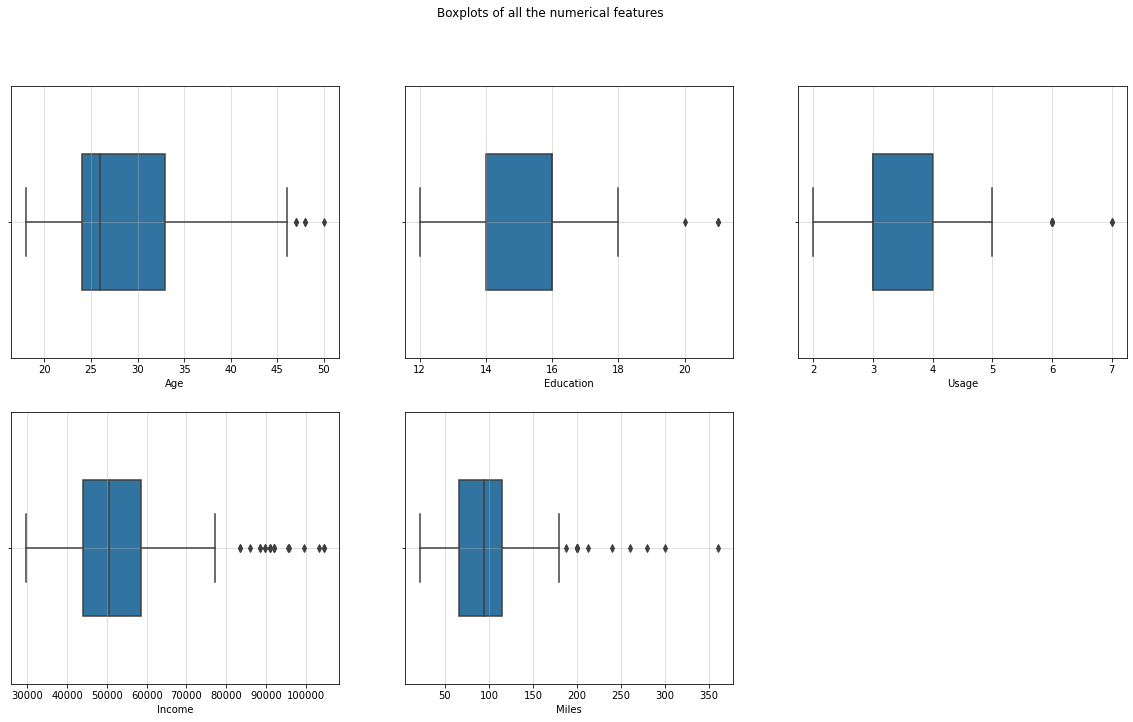

In [12]:
# plt.figure(figsize=(10,11))
plt.subplots(1,3,figsize=(20,11))
plt.suptitle('Boxplots of all the numerical features')

plt.subplot(2,3,1)
sns.boxplot(x=df['Age'], width=0.5)
plt.grid(alpha=0.5)

plt.subplot(2,3,2)
sns.boxplot(x=df['Education'], width=0.5)
plt.grid(alpha=0.5)


plt.subplot(2,3,3)
sns.boxplot(x=df['Usage'], width=0.5)
plt.grid(alpha=0.5)

# plt.subplot(2,3,4)
# sns.boxplot(x=df['Fitness'], width=0.5)
# plt.grid(alpha=0.5)

plt.subplot(2,3,4)
sns.boxplot(x=df['Income'], width=0.5)
plt.grid(alpha=0.5)

plt.subplot(2,3,5)
sns.boxplot(x=df['Miles'], width=0.5)
plt.grid(alpha=0.5)

$\color{blue}{\text{From the boxplots, one can observe more outliers in Miles and Income than other features. Both are right-skewed as can be seen from the boxplots and the mean and median values in the previous cell. The mean is higher than the median value}}$

$\color{blue}{\text{There are 7.22% outliers in Miles feature and 25% outliers in Income feature (look below for calculations).}}$

##### 

In [13]:
IQR_miles= df['Miles'].quantile(0.75) - df['Miles'].quantile(0.25)
IQR_miles

48.75

In [14]:
df['Miles'].quantile([0.25,0.75])

0.25     66.00
0.75    114.75
Name: Miles, dtype: float64

In [15]:
(df['Miles']>df['Miles'].quantile(0.75)+48.75*1.5).sum()

13

### %outliers in Miles

In [16]:
round((13/180*100),2)

7.22

In [17]:
df[df['Miles']>df['Miles'].quantile(0.75)+48.75*1.5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


##### 

In [18]:
IQR_income= df['Income'].quantile(0.75) - df['Income'].quantile(0.25)
IQR_income

14609.25

In [19]:
df['Income'].quantile([0.25,0.75])

0.25    44058.75
0.75    58668.00
Name: Income, dtype: float64

In [20]:
(df['Income']>df['Income'].quantile(0.75)+48.75*1.5).sum()

45

### % outliers in Income

In [21]:
round(45/180*100,2)

25.0

##### 

## **Associations among the different numerical features**

In [22]:
corr = df.corr().round(2)
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


In [23]:
# plt.figure(figsize=(8,5))
# sns.heatmap(corr, annot=True, linewidths=1, cmap='Blues')

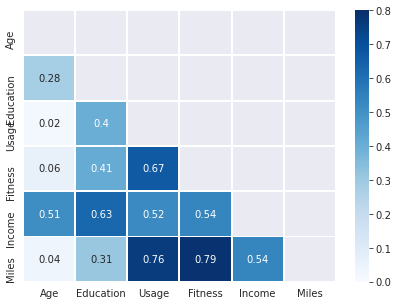

In [24]:
## the colormap blues are used because it is easier to tell that darkers regions are corelated.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=0.8, vmin=0,annot=True, linewidths=1, cmap='Blues')
    
#vmax is the limit of the colormap and has nothing to do with the corelation values

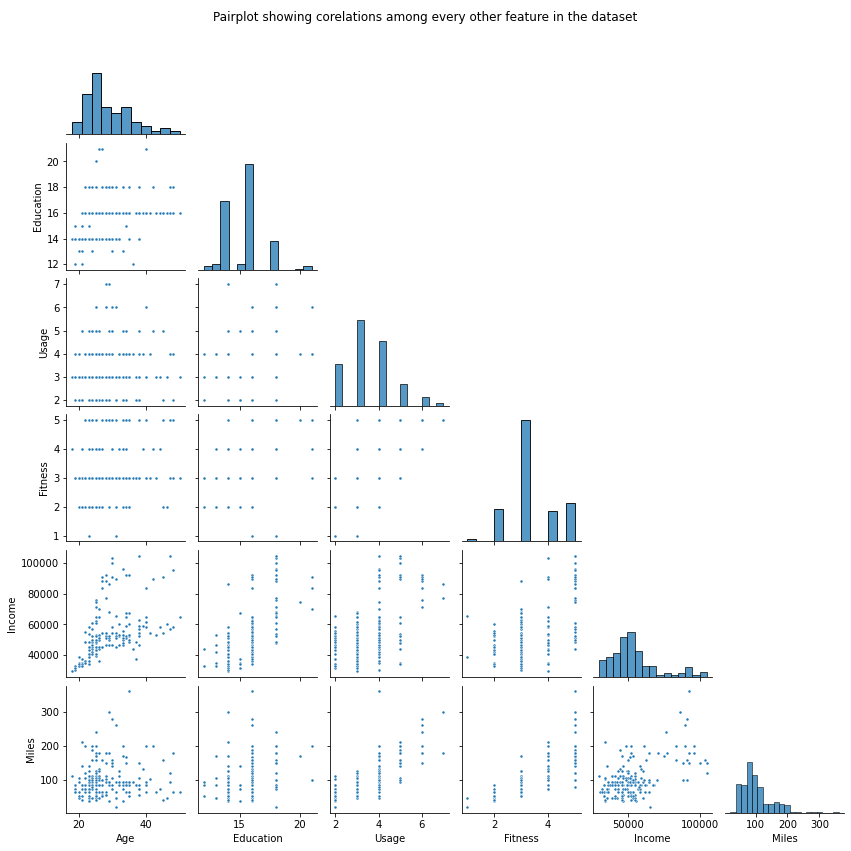

In [25]:
# plt.title('Pairplot showing corelations among every other feature in the dataset', fontdict={'fontsize':20}, loc='center')
pp = sns.pairplot(df,height=2, corner=True, markers='.')
pp.fig.suptitle("Pairplot showing corelations among every other feature in the dataset")
plt.show()


##### 

$\color{blue}{\text{1. Miles and usage seem to be correlated both from corelation values as well as the scatter plots. It makes sense as the number of times per week usage is more, the miles clocked should be higher}}$
<!-- **1. Miles and usage seem to be corelated both from corelation values as well as scatter plot. It makes sense as the number of times per week usage is more, the miles clocked should be higher.**  -->
$\color{blue}{\text{2. Same is true for miles vs fitness (although this should be read with a grain of salt, might not always be true)}}$


##### 

## Treadmills vs gender

In [26]:
pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [27]:
pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True, normalize=True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


### From the contigent table above

$\color{blue}{\text{1. 58% of males (104/180) vs 42% (76/180) females have brought the treadmills in the last 3 months. Males seem to be more active in terms of buying the the brand treadmills.}}$

$\color{blue}{\text{2. There is an almost equal preference for KP281 and KP481 among males and females, however, KP781 is a more popular choice among males (33 for males vs 7 for females)}}$

$\color{blue}{\text{3. Lower priced treadmill KP281 is sold twice as much as the highest priced KP781 (80 vs 40).}}$

##### 

## Income (over gender) vs treadmills

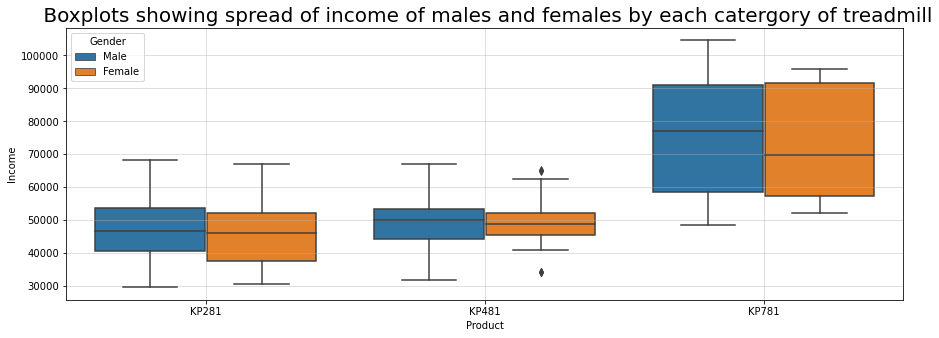

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='Income', x='Product', hue='Gender')
plt.grid(alpha=0.5)
plt.title(' Boxplots showing spread of income of males and females by each catergory of treadmill', fontdict={'fontsize':20})
plt.show()

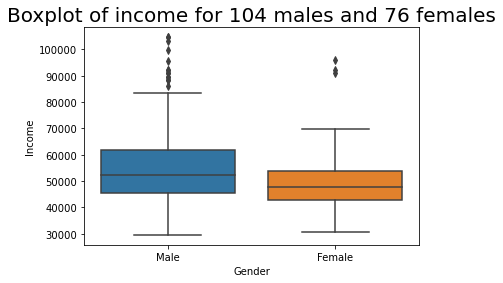

In [29]:
sns.boxplot(data=df, y='Income', x='Gender')
plt.title('Boxplot of income for 104 males and 76 females', fontdict={'fontsize':20})
plt.show()

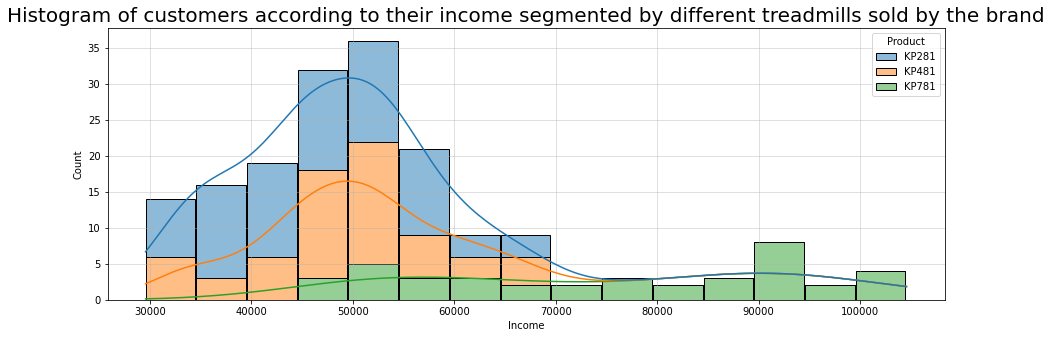

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='Income', hue='Product', kde=True,multiple="stack",shrink=0.98)
plt.grid(alpha=0.5)
plt.title('Histogram of customers according to their income segmented by different treadmills sold by the brand', fontdict={'fontsize':20})
plt.show()

##### 

$\color{blue}{\text{1. KP781 is more popular among males as well as higher income folks. There is higher variability in the income for the KP781 group than the other two}}$

$\color{blue}{\text{2. The IQR of income for males and females buying the treadmills is not very significant (refer the boxplots above and grouped df below), yet only 17% of total folks buying KP781 are females.}}$

##### 

In [31]:
df.groupby(['Product','Gender'])['Income'].agg(['min','mean','max','median']).round(2)

min      mean     max   median
Product Gender                                  
KP281   Female  30699  46020.08   67083  46048.5
        Male    29562  46815.98   68220  46617.0
KP481   Female  34110  49336.45   65220  48891.0
        Male    31836  48634.26   67083  50028.0
KP781   Female  52291  73633.86   95866  69721.0
        Male    48556  75825.03  104581  77191.0

#### 

## Treadmill vs Marital Status

In [32]:
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [33]:
# pd.crosstab(index=df['Product'], columns=df['MaritalStatus'],normalize=True).round(2)

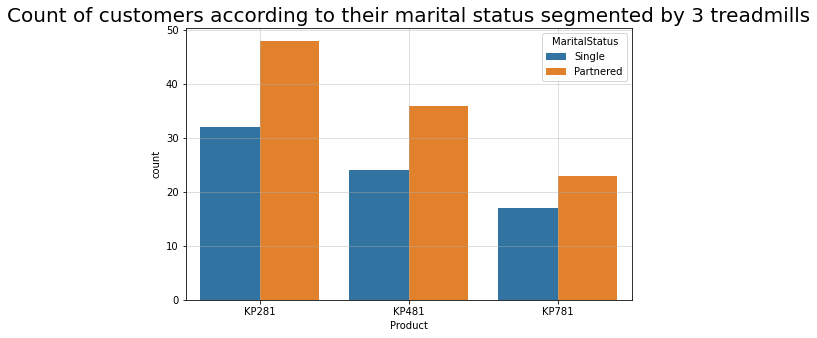

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.grid(alpha=0.5)
plt.title('Count of customers according to their marital status segmented by 3 treadmills', fontdict={'fontsize':20})
plt.show()

$\color{blue}{\text{The sale distribution among partnered and single people is 60% KP281, 60% KP481, and 58% KP781 for partnered customers. Clearly, partnered individuals have bought more treadmills than single across all 3 categories}}$

##### 

## Treadmills vs Fitness

In [35]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [36]:
(df['Fitness'].value_counts(normalize=True)*100).round(2)

3    53.89
5    17.22
2    14.44
4    13.33
1     1.11
Name: Fitness, dtype: float64

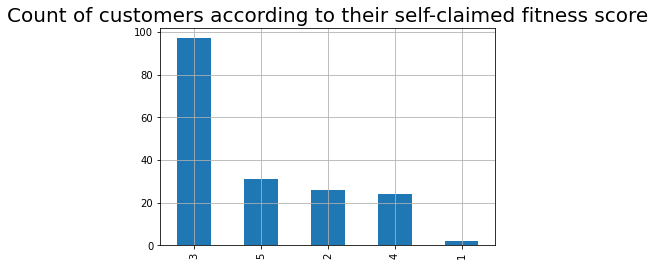

In [37]:
df['Fitness'].value_counts().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Count of customers according to their self-claimed fitness score', fontdict={'fontsize':20})
plt.show()

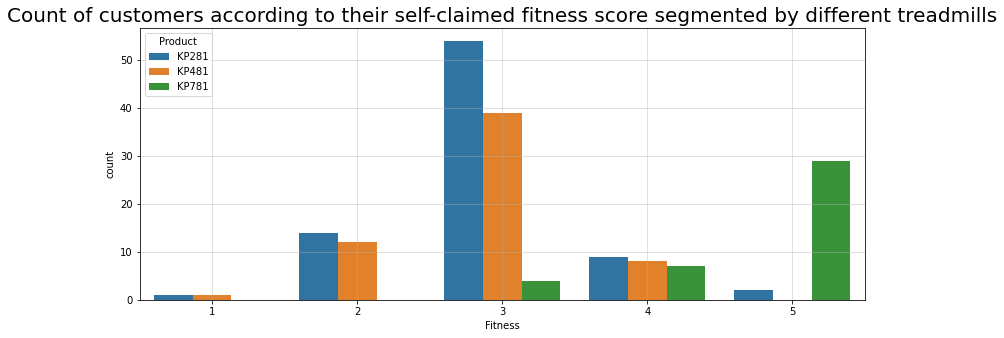

In [38]:
plt.figure(figsize=(13,5))
sns.countplot(data=df, hue='Product', x='Fitness')
plt.grid(alpha=0.5)
plt.title('Count of customers according to their self-claimed fitness score segmented by different treadmills', fontdict={'fontsize':20})
plt.show()

$\color{blue}{\text{The brand customer base mainly consists of people who think they are moderately fit (fitness rating 3, 54%) followed by people who rate themselves 5 (17%).}}$

$\color{blue}{\text{The brand is poorly represented amoung people who rate themselves 1 (just 1%) on the fitness scale. There is a great opportunity for the brand to increase the sales. Should invest in fitness campaign and then offer discounts for people who attend it.}}$

##### 

## Treadmill vs Mileage and Usage and Fitness

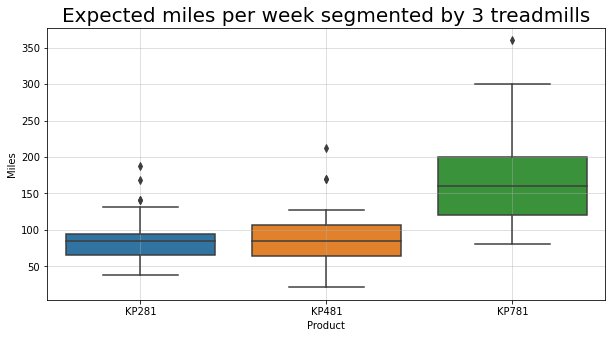

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='Miles', x='Product')
plt.grid(alpha=0.5)
plt.title('Expected miles per week segmented by 3 treadmills', fontdict={'fontsize':20})
plt.show()

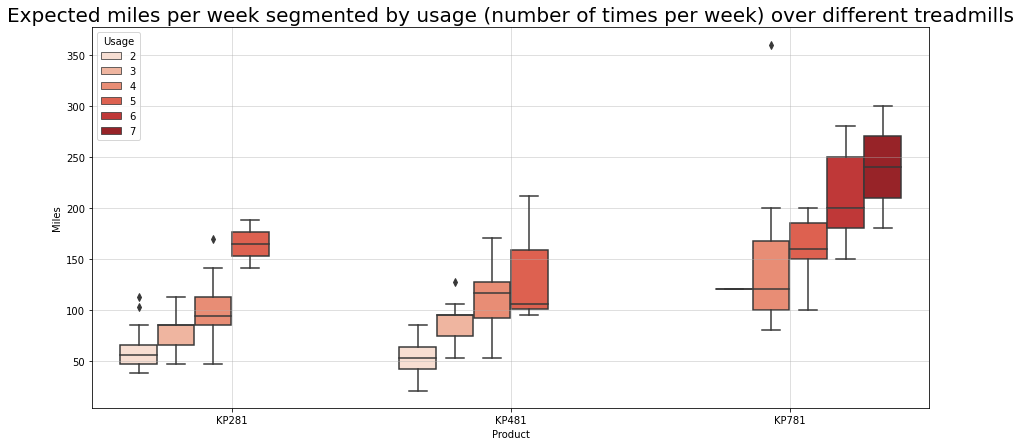

In [40]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, y='Miles', x='Product', hue='Usage',palette='Reds')
plt.grid(alpha=0.5)
plt.title('Expected miles per week segmented by usage (number of times per week) over different treadmills', fontdict={'fontsize':20})
plt.show()

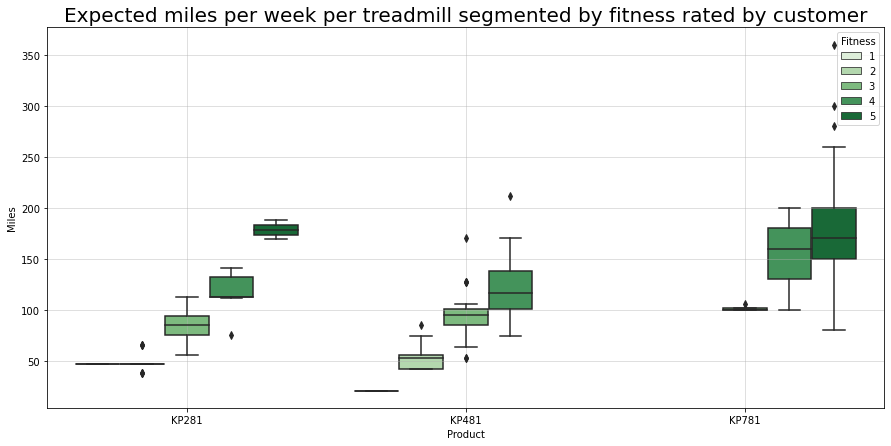

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, y='Miles', x='Product', hue='Fitness', palette='Greens')
plt.grid(alpha=0.5)
# plt.legend(loc='lower left',)
plt.title('Expected miles per week per treadmill segmented by fitness rated by customer', fontdict={'fontsize':20})
plt.show()

$\color{blue}{\text{Folks spending more on the treadmill also expect themselves to utilise more as more miles are recorded for KP781 than the other two.}}$

$\color{blue}{\text{Usage and miles are correlated as seen earlier in the correlation pair plots. People who intend to use more times per week recorded more miles}}$


$\color{blue}{\text{Across all 3 treadmills, people who rate themselves higher on the fitness scale are putting higher expected miles to walk/run per week}}$

##### 

## Treadmills vs Age

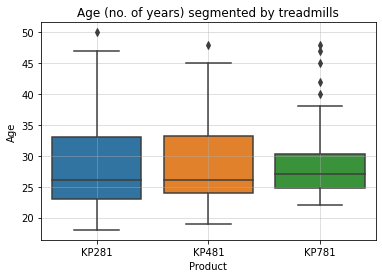

In [42]:
sns.boxplot(data=df, y='Age', x='Product')
plt.grid(alpha=0.5)
plt.title('Age (no. of years) segmented by treadmills')
plt.show()

In [43]:
df.groupby(['Product'])['Age'].agg([min, max, 'mean', 'median'])

,min,max,mean,median
Product,,,,
KP281,18,50,28.55,26
KP481,19,48,28.90,26
KP781,22,48,29.10,27


$\color{blue}{\text{Age doesn't seem to influence the type of treadmill bought by the customers.}}$

##### 

## Treadmills vs Education

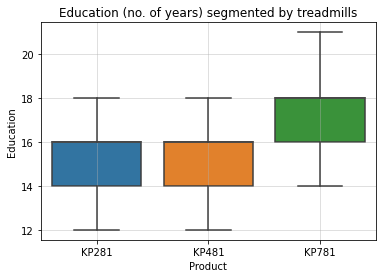

In [44]:
sns.boxplot(data=df, y='Education', x='Product')
plt.grid(alpha=0.5)
plt.title('Education (no. of years) segmented by treadmills')
plt.show()

In [45]:
df.groupby(['Product'])['Education'].agg([min,max,'mean','median']).round(0)

,min,max,mean,median
Product,,,,
KP281,12,18,15.0,16
KP481,12,18,15.0,16
KP781,14,21,17.0,18


In [46]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

##### 

$\color{blue}{\text{The median years of education of people buying KP781 is 18 years (for 40 people) which is higher than for the other two treadmills (16 years).}}$

## 

## Miscellaneous

######

#### Revenue from treadmills

In [47]:
k = df['Product'].value_counts()
k

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [48]:
price_treadmill = {'KP281': 1500,
                   'KP481': 1750,
                   'KP781': 2500}

In [49]:
for i in price_treadmill:
    print(f'Revenue for {i} is {k[i]} * {price_treadmill[i]} = ${k[i]*price_treadmill[i]}')
    

Revenue for KP281 is 80 * 1500 = $120000
Revenue for KP481 is 60 * 1750 = $105000
Revenue for KP781 is 40 * 2500 = $100000


$\color{blue}{\text{The revenue for KP281 is only \$20000 more than KP781 in the last 3 months however, the units sold for KP281 is twice as much as of KP781.}}$ 

$\color{blue}{\text{If the brand could sell just 8 more units of KP781 (or 6 more if compared with KP481), it would have generated the same revenue as KP281. In other words, it would be worth while to invest in increasing the sale of KP781.}}$

# 

# Recommendations

a.	There are 16% more males in the customer base of the brand as compared to females. This difference majorly comes from the difference in the sale of premium range treadmill (KP781). For the other two treadmills (KP281 and KP481), the buying ratio of males to females is almost equal but not for KP781 (82.5 % males vs 17.5 % females). Understanding why KP781 is more appealing to males than females is recommended.


b.	75% of KP781 is bought by people having an income of at least $60,000. Targeting females beyond this income range would be useful. Also, providing EMI options for KP781 might make it more accessible for relatively lower income group.


c.	The revenue for KP281 is only $20000 more than KP781 in the last 3 months however, the units sold for KP281 (80 machines) is twice as much as of KP781 (40 machines). If the brand could sell just 8 more units of KP781 (or 6 more if compared with KP481), it would have generated the same revenue as KP281. In other words, it would be worthwhile to invest in increasing the sale of KP781 tying back to the previous points.


d.	The sale distribution among partnered and single people is 60% KP281, 60% KP481, and 58% KP781 for partnered customers. Clearly, partnered customers have a higher probability of getting a treadmill as compared to single individuals. Could offer higher discounts for single individuals on their birthdays to promote sales among this groups. Also, call partnered individuals on anniversaries to offer discounts. 


e.	The brand is poorly represented among people (just 1% of total customers) who rate themselves 1 on the fitness scale. There is a potential to increase sales. Should run fitness campaigns and then promote products in the campaign. Perhaps, give on spot reduced prices to people who attend it.

### Treadmill profile for targeted recommendation:


$\color{green}{\text{i. In general, KP781 is popular among males, higher income ($ \$60000 \ $ to $ \$ 90000$) group, fitness rating of 5, and expect to use it 4 to 7 times per week. }}$

    
 $\color{green}{\text{ii. KP281 is equally preferred between males and females but more among partnered individuals, people who rate themselves 2, 3 or 4 on the fitness scale, expected usage of 2 – 5 times per week, income range of \$40000 to \$50000. }}$ 
 
 $\color{green}{\text{iii. Almost similar attributes as KP281 are also for customers to recommend KP481. It will come down to a matter of personal choice of the customer.}}$ 

$\color{green}{\text{iv. Age or level of education can be disregarded while making the recommendation of treadmills.}}$


****

#### 

In [50]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [51]:
pd.crosstab(index=df['Education'], columns=df['Fitness'])

Fitness,1,2,3,4,5
Education,,,,,
12,0,1,2,0,0
13,0,2,2,1,0
14,0,11,35,8,1
15,0,1,3,1,0
16,1,11,50,8,15
18,1,0,4,5,13
20,0,0,0,0,1
21,0,0,1,1,1


In [52]:
df['Education'].value_counts()

16    85
14    55
18    23
13     5
15     5
12     3
21     3
20     1
Name: Education, dtype: int64